## Modèle Baseline

In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist  
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime
import os

# Charger le dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Encodage One-hot des labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modèle "Baseline"
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')       
])

# Compiler le modèle
# On utilise SGD optimiseur de base
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# TensorBoard callback
log_dir = os.path.join(r"C:\Users\Moi\Documents\tensorboard", "fit_baseline_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

print(f"Entraînement lancé... Logs enregistrés dans : {log_dir}")
# Entraînement du modèle
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

# Évaluer le modèle
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Baseline Loss : {loss:.4f}")
print(f"Baseline Accuracy : {accuracy:.4f}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


c:\ProgramData\miniconda3\envs\test\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entraînement lancé... Logs enregistrés dans : C:\Users\Moi\Documents\tensorboard\fit_baseline_20260121-013014
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7544 - loss: 0.7547 - val_accuracy: 0.7939 - val_loss: 0.5892
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8252 - loss: 0.5160 - val_accuracy: 0.8250 - val_loss: 0.5060
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8384 - loss: 0.4701 - val_accuracy: 0.8323 - val_loss: 0.4786
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8458 - loss: 0.4446 - val_accuracy: 0.8337 - val_loss: 0.4688
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8518 - loss: 0.4263 - val_accuracy: 0.8442 - val_loss: 0.4469
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8566 - loss: 0.4137 - val_accuracy: 0.8470 - val_loss: 0.4369
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8616 - loss: 0.4011 - val_accuracy:

## Modèle Avancé

In [2]:
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import Adam

# On augmente la capacité (256 neurones) et on ajoute les techniques de régularisation
model_advanced = Sequential([
    Flatten(input_shape=(28, 28, 1)),

    # Couche cachée 1
    Dense(256, activation='relu'),       
    BatchNormalization(),      # Normalisation par lot pour stabiliser et accélérer l'entraînement
    Dropout(0.3),    # Éteint 30% des neurones aléatoirement pour éviter le surapprentissage

    # Couche cachée 2
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Couche de sortie
    Dense(10, activation='softmax')
])

# optimisation avec Adam
model_advanced.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# TensorBoard callback pour le modèle avancé
log_dir_advanced = os.path.join(r"C:\Users\Moi\Documents\tensorboard", "fit_advanced_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback_advanced = TensorBoard(log_dir=log_dir_advanced, histogram_freq=1)

print("Entraînement du modèle AVANCÉ lancé...")

# Entraînement du challenger
model_advanced.fit(
    x_train, y_train,
    epochs=10,           # Même nombre d'époques pour une comparaison juste
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback_advanced]
)

# Évaluer le modèle avancé
loss, accuracy = model_advanced.evaluate(x_test, y_test, verbose=1)
print(f"Advanced Model Accuracy : {accuracy:.4f}")

c:\ProgramData\miniconda3\envs\test\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entraînement du modèle AVANCÉ lancé...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7900 - loss: 0.5881 - val_accuracy: 0.8159 - val_loss: 0.5406
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8299 - loss: 0.4748 - val_accuracy: 0.8497 - val_loss: 0.4080
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8398 - loss: 0.4466 - val_accuracy: 0.8556 - val_loss: 0.3981
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8466 - loss: 0.4279 - val_accuracy: 0.8569 - val_loss: 0.3856
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8476 - loss: 0.4189 - val_accuracy: 0.8604 - val_loss: 0.3920
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8564 - loss: 0.3980 - val_accuracy: 0.8624 - val_loss: 0.3780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8559 - loss: 0.3957 - val_accuracy: 0.8526 - val_loss: 0.4146
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15

## Matrice de Confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


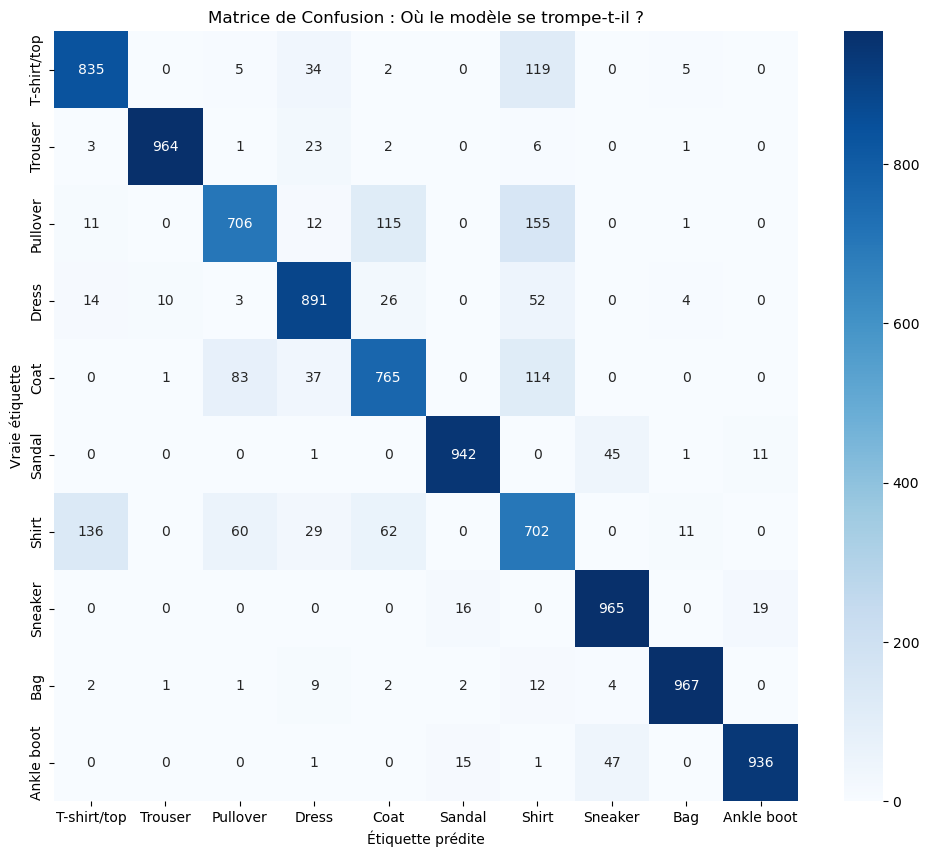

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prédictions sur tout le dataset de test
# Le modèle sort des probabilités (Softmax), on prend l'index du max (Argmax)
y_prob = model_advanced.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Définition des noms des classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Afficher le graphique "Heatmap"
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Matrice de Confusion : Où le modèle se trompe-t-il ?')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

## tensorboard --logdir